1. Analyzing the Predictability of European Football Leagues

Introduction
Over the past few decades football has been criticsed for being too predictable. The elite clubs in europe continue to increase their revenues year after year and thus can spend small fortunes on lesser clubs' best players. This is perhaps most apparent in Germany where Bayern Munich have a monopoly-like claim on any young promising German player.

This notebook will attempt to analyze the top 5 European league's predictability by utilizing bookmakers odds for each match. The idea is that if there are consistently large favourites in games throughout the season then the league is considered predictable. The goal here is to find the most unpredictable league which should then also be the most competitive and interesting one to watch.

Data was taken from kaggle and reference for data source can be found here: 
http://football-data.co.uk/notes.txt
https://www.kaggle.com/stallians/do-teams-playing-home-have-an-advantage



In [21]:
#2. Importing data: option from RDBM - Sqlite.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
from sqlalchemy import create_engine

import numpy as np

from numpy import random
from scipy.stats import entropy
from matplotlib.lines import Line2D
from matplotlib import rcParams

sns.set(style="whitegrid")
%matplotlib inline

In [96]:

# Load data using SQL.
engine = create_engine('sqlite:///database.sqlite')
table_names = engine.table_names()

with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * FROM Country", con)
    leagues = pd.read_sql_query("SELECT * FROM League", con)
    players = pd.read_sql_query("SELECT * FROM Player", con)
    player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
    matches = pd.read_sql_query("SELECT * FROM Match", con)
    teams = pd.read_sql_query("SELECT * FROM Team", con)
    teams_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", con)

In [97]:
len(table_names)

8

In [98]:
table_names[:]

['Country',
 'League',
 'Match',
 'Player',
 'Player_Attributes',
 'Team',
 'Team_Attributes',
 'sqlite_sequence']

In [100]:
teams.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [99]:
leagues.head(5)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [69]:
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [64]:
matches.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [67]:
player_attributes.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [66]:
matches.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [61]:
teams_attributes.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [ ]:
3. Data Cleaning 


In [152]:

# Subset on relevant countries.
selected_countries = ['England', 'France', 'Germany', 'Italy', 'Spain']
countries = countries[countries.name.isin(selected_countries)]

countries

,id,name
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
9,21518,Spain


In [153]:
#3 Merge countries and leagues.
leagues = countries.merge(leagues, on='id', suffixes=('', '_y'))

leagues

,id,name,country_id,name_y
0,1729,England,1729,England Premier League
1,4769,France,4769,France Ligue 1
2,7809,Germany,7809,Germany 1. Bundesliga
3,10257,Italy,10257,Italy Serie A
4,21518,Spain,21518,Spain LIGA BBVA


In [154]:
# Subset matches on relevant leagues.
matches = matches[matches.league_id.isin(leagues.id)]


In [162]:
# Checking all columns.
matches.columns.values

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id', 'B365H',
       'B365D', 'B365A', 'entropy'], dtype=object)

This notebook uses bet365 as the booker whos odds are used in calculations. These probabilities should reflect the objective chance for each game outcome.



In [156]:
# Subset on releveant fields.
matches = matches[['id', 'country_id' ,'league_id', 'season', 'stage', 'date','match_api_id', 
                   'home_team_api_id', 'away_team_api_id','B365H', 'B365D' ,'B365A']]

# Drop any null rows.
matches.dropna(inplace=True)

matches.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1.29,5.5,11.0
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1.20,6.5,15.0


Entropy¶
In Information Theory, entropy is a measurement for uncertainty for an event’s outcome. In this case, the event is a football match and there are three possible outcomes: a win for the home team, a win for the away team or a draw. If the three outcomes are equally probable, the uncertainty is maximal and so is the entropy (log(3)=1.584963). As the probability of a particular outcome will get closer to one - almost no uncertainty - the match entropy will approach zero. In summary, the entropy of a football game outcome is bounded by 0 and 1.59, where 0 is total predictability.

In [163]:
#4
def match_entropy(row):
    """
    Takes a row from the matches df, transforms the odds into normalized
    probabilities. Returns the entropy of these probabilities.
    """

    # Select the odds for home, draw, away.
    odds = [row['B365H'], row['B365D'], row['B365A']]

    # Take the inverse to change decimal odds to probability.
    probs = [1/o for o in odds]

    # Get the sum of probabilities.
    norm = sum(probs)

    # Normalize the probalities.
    # (Accounts for bookies using "overround").
    probs = [p/norm for p in probs]

    # Take the entropy of the normalized probabilities.
    result = entropy(probs)
    
    return result

In [164]:
# Compute entropy for every match
matches['entropy'] = matches.apply(match_entropy, axis=1)

In [165]:
matches.head(2)


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A,entropy
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1.29,5.5,11.0,0.738980
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1.20,6.5,15.0,0.641186


In [166]:

# Compute mean entropy for every league for every season.
entropy_means = matches.groupby(('league_id', 'season')).entropy.mean()

In [168]:
# Transpose the table so that season is the index.
entropy_means = entropy_means.reset_index().pivot(index='season', columns='league_id', values='entropy')

# Change league id to its name.
entropy_means.columns = [leagues[leagues.id==x].name.values[0] for x in entropy_means.columns]

entropy_means

,England,France,Germany,Italy,Spain
season,,,,,
2008/2009,0.984556,1.026638,1.004276,1.002201,1.010859
2009/2010,0.956496,1.013821,0.997925,1.006755,0.977810
2010/2011,0.983258,1.026236,1.016264,1.006029,0.975032
2011/2012,0.969593,1.024915,1.001298,1.003077,0.955339
2012/2013,0.981472,1.016116,0.993993,1.003565,0.970580
2013/2014,0.960473,1.004439,0.977500,0.992622,0.944218
2014/2015,0.980301,1.012495,0.985835,0.999100,0.933637
2015/2016,0.997819,1.013928,0.974657,0.985284,0.946813


In [169]:
entropy_means.mean()


England    0.976746
France     1.017324
Germany    0.993969
Italy      0.999829
Spain      0.964286
dtype: float64

In [146]:
entropy_means.mean()


Belgium Jupiler League      0.998934
England Premier League      0.976746
France Ligue 1              1.017324
Germany 1. Bundesliga       0.993969
Italy Serie A               0.999829
Netherlands Eredivisie      0.959155
Portugal Liga ZON Sagres    0.976492
Scotland Premier League     0.996833
Spain LIGA BBVA             0.964286
dtype: float64

In [ ]:
Visualize

Text(7.3,0.952,'more predictable')

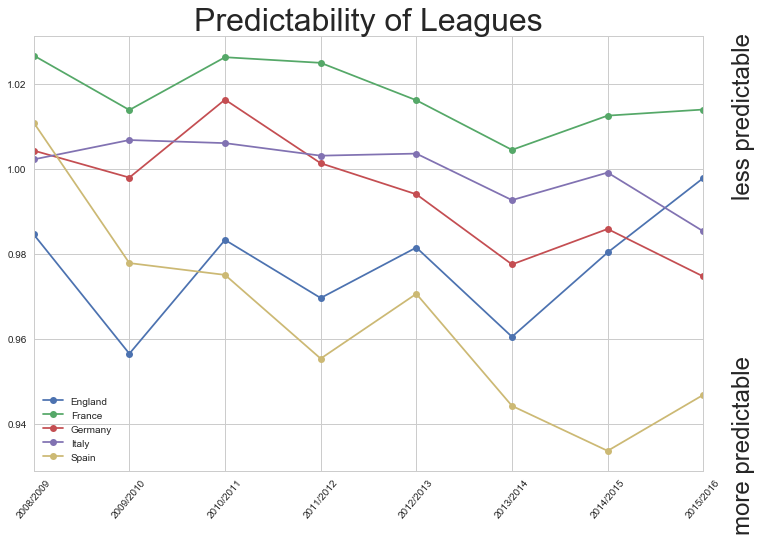

In [170]:
# Plot scatterplot.
ax = entropy_means.plot(figsize=(12,8), marker='o')

# Set title.
plt.title('Predictability of Leagues', fontsize=32)

# Set ticks roatation.
plt.xticks(rotation=50)

# Store color-league map for next graph.
colors = [x.get_color() for x in ax.get_lines()]
colors_mapping = dict(zip(leagues.id, colors))

# Remove x label.
ax.set_xlabel('')

# Locate legend.
plt.legend(loc='lower left')

# Add arrows.
ax.annotate('', xytext=(7.2, 1),xy=(7.2, 1.039),
            arrowprops=dict(facecolor='black', arrowstyle="->, head_length=.7, head_width=.3", 
                            linewidth=1), annotation_clip=False)

ax.annotate('', xytext=(7.2, 0.96),xy=(7.2, 0.921),
            arrowprops=dict(facecolor='black', arrowstyle="->, head_length=.7, head_width=.3",
                            linewidth=1), annotation_clip=False)

ax.annotate('less predictable', xy=(7.3, 1.028), annotation_clip=False, fontsize=24, rotation='vertical')
ax.annotate('more predictable', xy=(7.3, 0.952), annotation_clip=False, fontsize=24, rotation='vertical')

In [171]:
# Initialize arrays for df cols.
season_col = []
league_col = []
team_col = []
entropy_col = []

# Aggregate the matches by season.
for season, season_df in matches.groupby('season'):

    # For each team, get every match in which it is the home or away team.
    for team_id, team_name in zip(teams.team_api_id, teams.team_long_name):
        team_df = season_df[(season_df.home_team_api_id==team_id) | (season_df.away_team_api_id==team_id)]
        
        # Skip if the team isn't in the df for the 5 leagues.
        if team_df.empty:
            continue
            
        # Get the mean of entropy of the games that team was in.
        team_entropy = team_df.entropy.mean()
        
        # Get the league name.
        league_id = team_df.league_id.values[0]
        league_name = leagues[leagues.id == league_id].name.values[0]
        
        # Add values to the df cols.
        season_col.append(season)
        league_col.append(league_name)
        team_col.append(team_name)
        entropy_col.append(team_entropy)

In [172]:
# Create the dataframe.
data = {'Season': season_col,
        'League': league_col,
        'Team': team_col,
        'Entropy': entropy_col}

df = pd.DataFrame(data, columns=['Season', 'League', 'Team', 'Entropy'])
df.head(3)

,Season,League,Team,Entropy
0,2008/2009,England,Manchester United,0.843126
1,2008/2009,England,Newcastle United,1.014772
2,2008/2009,England,Arsenal,0.928750


In [173]:

# Lists of unique seasons and leagues.
seasons_list = df.Season.unique()
leagues_list = df.League.unique()

# Offsets for x coords, centered on season line.
offsets = [-0.2,-0.1,0,0.1,0.2]

# Dicts to map out x coords.
seasons_dict = dict(zip(seasons_list, range(len(seasons_list))))
leagues_dict = dict(zip(leagues_list, offsets))

In [174]:
def makeXCoord(row):
    """
    Takes in row and determines the X coordinate based on season and league.
    """
    
    # Get the X values for the season and league.
    season = seasons_dict[row.Season]
    offset = leagues_dict[row.League]
    
    # Add the values.
    X = season + offset
    
    return X

In [175]:
def makeColour(row):
    """
    Takes in row and determines the colour from the past plot.
    """
    
    # Get the league name and then the league id.
    league_name = row.League
    league_id = leagues[leagues.name == league_name].id.unique()[0]

    # Look up the colour dict.
    color = colors_mapping[league_id]

    return color

In [178]:
df['X'] = df.apply(makeXCoord, axis=1)
df['Colour'] = df.apply(makeColour, axis=1)

In [179]:
df.head()

,Season,League,Team,Entropy,X,Colour
0,2008/2009,England,Manchester United,0.843126,-0.2,"(0.2980392156862745, 0.4470588235294118, 0.690..."
1,2008/2009,England,Newcastle United,1.014772,-0.2,"(0.2980392156862745, 0.4470588235294118, 0.690..."
2,2008/2009,England,Arsenal,0.928750,-0.2,"(0.2980392156862745, 0.4470588235294118, 0.690..."
3,2008/2009,England,West Bromwich Albion,0.970541,-0.2,"(0.2980392156862745, 0.4470588235294118, 0.690..."
4,2008/2009,England,Sunderland,1.010873,-0.2,"(0.2980392156862745, 0.4470588235294118, 0.690..."
